In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv(r"C:\Users\hakand\OneDrive\Desktop\rvws\IMDB Dataset.csv")

# drop any rows with missing values
data.dropna(inplace=True)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:

# convert sentiment to binary labels (0=negative, 1=positive)
data['sentiment'] = data['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [4]:

# preprocess text data
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['review'])
y = data['sentiment']


In [5]:
X

<50000x101583 sparse matrix of type '<class 'numpy.float64'>'
	with 4434500 stored elements in Compressed Sparse Row format>

In [6]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [8]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(40000, 101583)

In [13]:
X_test.shape

(10000, 101583)

In [28]:
y_train.shape

(40000,)

In [29]:
y_test.shape

(10000,)

# Naive Bayes ML model

In [14]:
# train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# make predictions on test set
y_pred = model.predict(X_test)

In [16]:
# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8654


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

[[4352  609]
 [ 737 4302]]


# Random forest model

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.861


In [21]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4279  682]
 [ 708 4331]]


In [22]:
#exp 2
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [23]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8467


In [24]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[4224  737]
 [ 796 4243]]


In [25]:
#exp 3 

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [26]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.865


In [27]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4961
           1       0.87      0.86      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.87      0.86      0.87     10000

[[4294  667]
 [ 683 4356]]


In [30]:
#exp 4

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [31]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8652


In [32]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4961
           1       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

[[4297  664]
 [ 684 4355]]


# SVM model

In [27]:
from sklearn.svm import SVC

# train model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8968


In [29]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[4404  557]
 [ 475 4564]]


In [33]:
from sklearn.svm import SVC

# train model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [34]:
# make predictions on test set
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9007


In [35]:
# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[4389  572]
 [ 421 4618]]


# Deep Learning Model

In [56]:
import tensorflow as tf
from keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten

In [57]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [58]:
# Split the data into training and testing sets
train_data = data[:40000]
test_data = data[40000:]

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    # remove HTML tags
    text = re.sub('<.*?>', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
train_data['review'] = train_data['review'].apply(clean_text)
test_data['review'] = test_data['review'].apply(clean_text)

In [65]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

X_train = tokenizer.texts_to_sequences(train_data['review'])
X_test = tokenizer.texts_to_sequences(test_data['review'])

# Pad the sequences
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)


In [66]:

# Define the model architecture
model = Sequential()
model.add(Embedding(5000, 32, input_length=200))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               819328    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 979,457
Trainable params: 979,457
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9166 - accuracy: 0.4977 - val_loss: 0.6937 - val_accuracy: 0.5024
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6907 - accuracy: 0.5146 - val_loss: 0.6939 - val_accuracy: 0.5013
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6811 - accuracy: 0.5196 - val_loss: 0.6950 - val_accuracy: 0.4977
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6688 - accuracy: 0.5299 - val_loss: 0.6979 - val_accuracy: 0.5055
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6566 - accuracy: 0.5384 - val_loss: 0.7030 - val_accuracy: 0.4961
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6460 - accuracy: 0.5424 - val_loss: 0.7088 - val_accuracy: 0.4968
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6404 - accuracy: 0.5463 - val_loss: 0.7129 - val_accuracy:

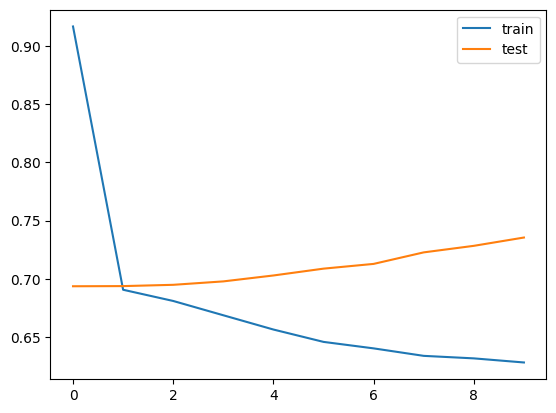

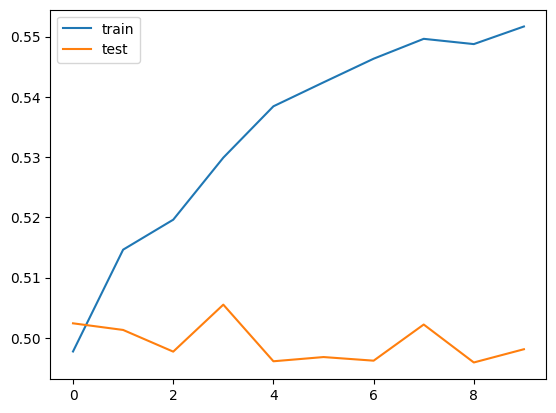

In [69]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_pred = np.round(y_pred).flatten()

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 731us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.94      0.65      4961
           1       0.52      0.06      0.11      5039

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.38     10000
weighted avg       0.51      0.50      0.38     10000

Confusion Matrix:
 [[4673  288]
 [4731  308]]


Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6258 - accuracy: 0.5544 - val_loss: 0.7633 - val_accuracy: 0.4970
Epoch 2/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6247 - accuracy: 0.5559 - val_loss: 0.7635 - val_accuracy: 0.4947
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6213 - accuracy: 0.5583 - val_loss: 0.7713 - val_accuracy: 0.4959
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6215 - accuracy: 0.5592 - val_loss: 0.7816 - val_accuracy: 0.4958
Epoch 5/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6206 - accuracy: 0.5586 - val_loss: 0.7920 - val_accuracy: 0.4940
Epoch 6/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6184 - accuracy: 0.5595 - val_loss: 0.7931 - val_accuracy: 0.5028
Epoch 7/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6155 - accuracy: 0.5592 - val_loss: 0.8098 - val_accuracy:

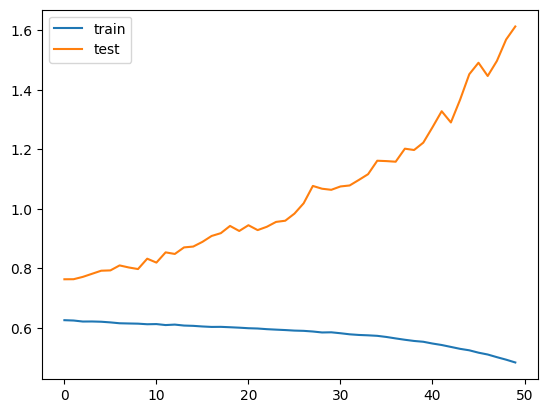

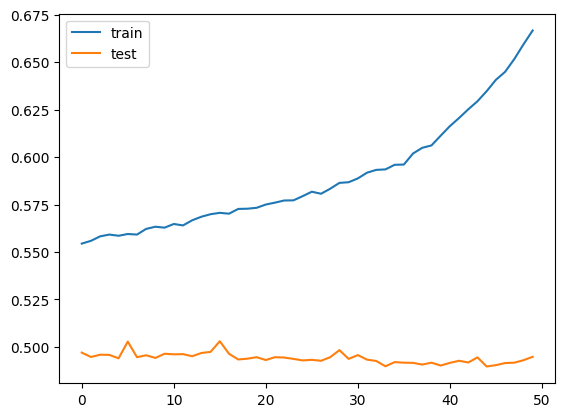

In [72]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_pred = np.round(y_pred).flatten()

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 792us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.76      0.60      4961
           1       0.50      0.24      0.32      5039

    accuracy                           0.49     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.50      0.49      0.46     10000

Confusion Matrix:
 [[3755 1206]
 [3846 1193]]


#Changing learning rate from 0.001 to 0.0001

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4728 - accuracy: 0.6743 - val_loss: 1.7004 - val_accuracy: 0.4938
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4664 - accuracy: 0.6784 - val_loss: 1.7099 - val_accuracy: 0.4930
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4631 - accuracy: 0.6803 - val_loss: 1.7571 - val_accuracy: 0.4927
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4589 - accuracy: 0.6851 - val_loss: 1.7861 - val_accuracy: 0.4925
Epoch 5/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4563 - accuracy: 0.6848 - val_loss: 1.8274 - val_accuracy: 0.4911
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4537 - accuracy: 0.6877 - val_loss: 1.8748 - val_accuracy: 0.4921
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4496 - accuracy: 0.6896 - val_loss: 1.9112 - val_accuracy:

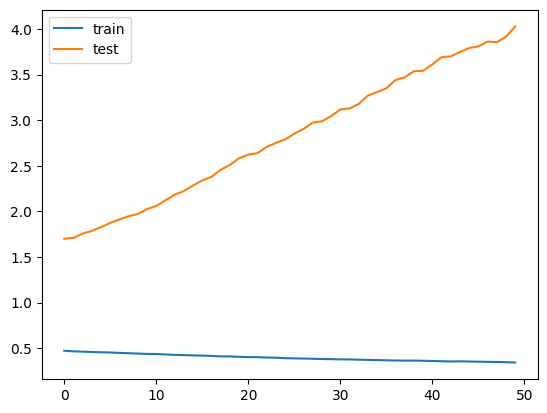

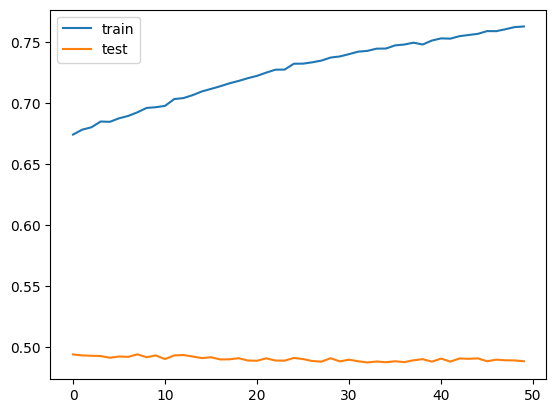

In [74]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_pred = np.round(y_pred).flatten()

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 744us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.60      0.54      4961
           1       0.49      0.38      0.43      5039

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

Confusion Matrix:
 [[2964 1997]
 [3121 1918]]


# adding more dense layers in model

In [76]:
# Define the model architecture
model = Sequential()
model.add(Embedding(5000, 32, input_length=200))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               819328    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6934 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5047
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6913 - accuracy: 0.5264 - val_loss: 0.6932 - val_accuracy: 0.5051
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6598 - accuracy: 0.5964 - val_loss: 0.7122 - val_accuracy: 0.5030
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5200 - accuracy: 0.7314 - val_loss: 0.8454 - val_accuracy: 0.5089
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3693 - accuracy: 0.8377 - val_loss: 1.0927 - val_accuracy: 0.5108
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2374 - accuracy: 0.9113 - val_loss: 1.4503 - val_accuracy: 0.5056
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1359 - accuracy: 0.9585 - val_loss: 1.8672 - val_accuracy:

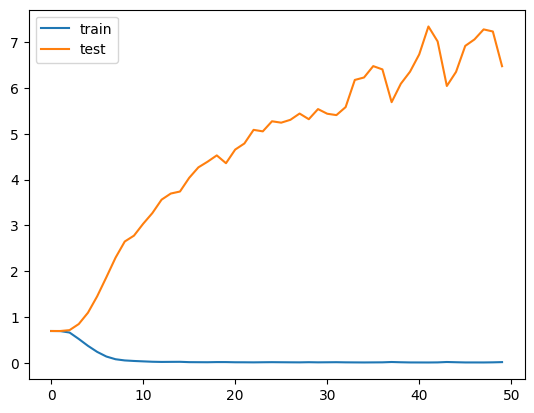

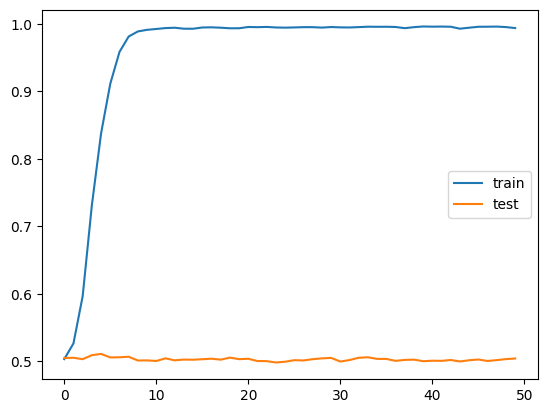

In [77]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_pred = np.round(y_pred).flatten()

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 845us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      4961
           1       0.51      0.51      0.51      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Confusion Matrix:
 [[2493 2468]
 [2492 2547]]


# CNN model

In [89]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Sequential
sequence_length = X_train.shape[1]

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 198, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 conv1d_4 (Conv1D)           (None, 97, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 48, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                      

In [90]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test to include input_dim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [91]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 7s 3ms/step - loss: 14.1117 - accuracy: 0.5005 - val_loss: 1.2314 - val_accuracy: 0.5006
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.9939 - accuracy: 0.4983 - val_loss: 0.7393 - val_accuracy: 0.5013
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7340 - accuracy: 0.4967 - val_loss: 0.7166 - val_accuracy: 0.4998
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7151 - accuracy: 0.4971 - val_loss: 0.6990 - val_accuracy: 0.5040
Epoch 5/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7042 - accuracy: 0.5012 - val_loss: 0.6977 - val_accuracy: 0.4979
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7006 - accuracy: 0.5005 - val_loss: 0.6951 - val_accuracy: 0.5039
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6972 - accuracy: 0.5004 - val_loss: 0.6965 - val_accuracy

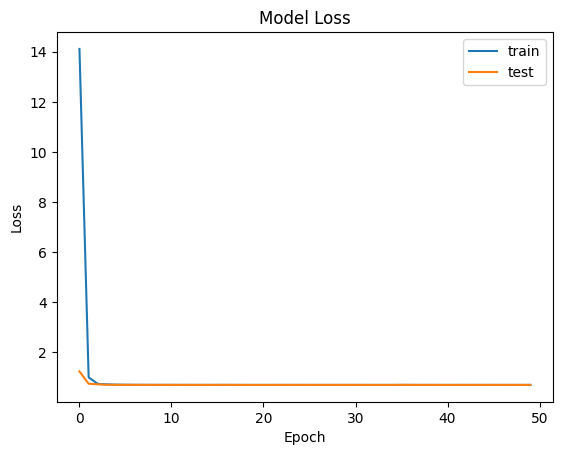

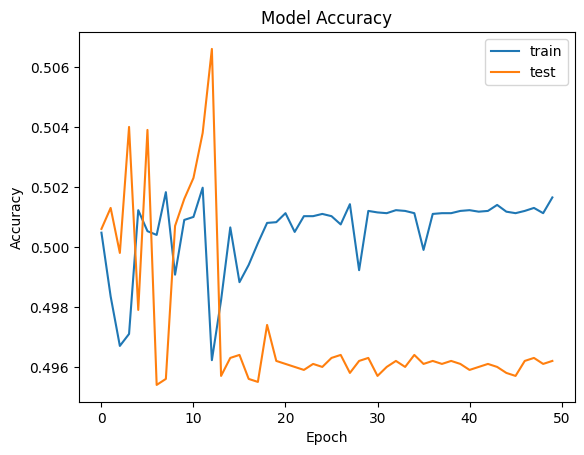

In [92]:
# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [93]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.693
Test accuracy: 0.496


In [95]:
# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


313/313 [==============================] - 0s 976us/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.51      0.00      0.01      5039

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.33     10000
weighted avg       0.51      0.50      0.33     10000

[[4944   17]
 [5021   18]]


#Add more conv layers in CNN model

In [96]:
# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 198, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 97, 32)            6176      
                                                                 
 conv1d_7 (Conv1D)           (None, 95, 32)            3104      
                                                                 
 conv1d_8 (Conv1D)           (None, 93, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 46, 32)           0         
 1D)                                                 

In [97]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test to include input_dim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 2.9349 - accuracy: 0.5029 - val_loss: 0.6948 - val_accuracy: 0.5058
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6958 - accuracy: 0.4999 - val_loss: 0.6938 - val_accuracy: 0.4957
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6942 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6936 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6930 - val_accuracy: 0.4968
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6930 - val_accuracy: 0.4961
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy:

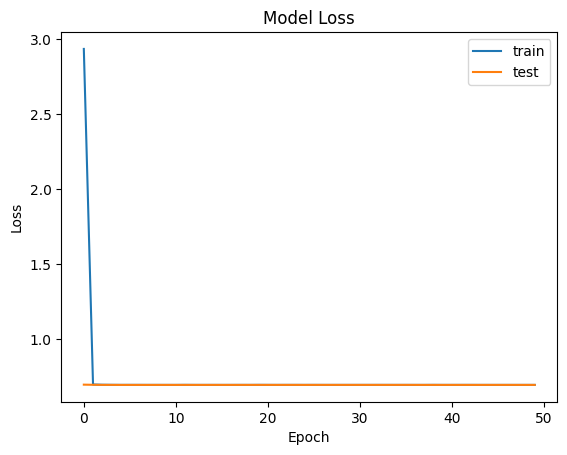

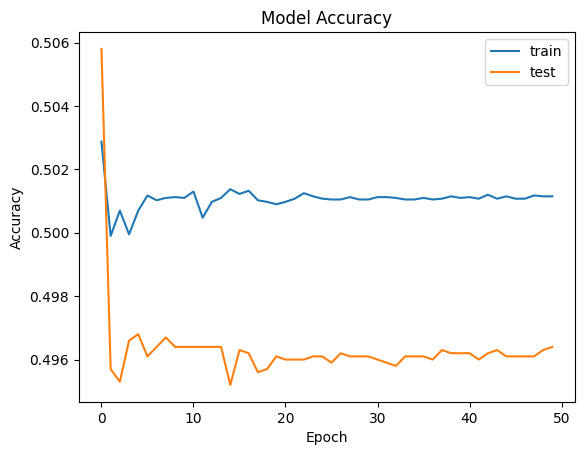

Test loss: 0.693
Test accuracy: 0.496
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.71      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.61      0.50      0.33     10000
weighted avg       0.61      0.50      0.33     10000

[[4959    2]
 [5034    5]]


In [98]:
# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


In [99]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.SGD(learning_rate=0.00001) #change learning rate and optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test to include input_dim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy:

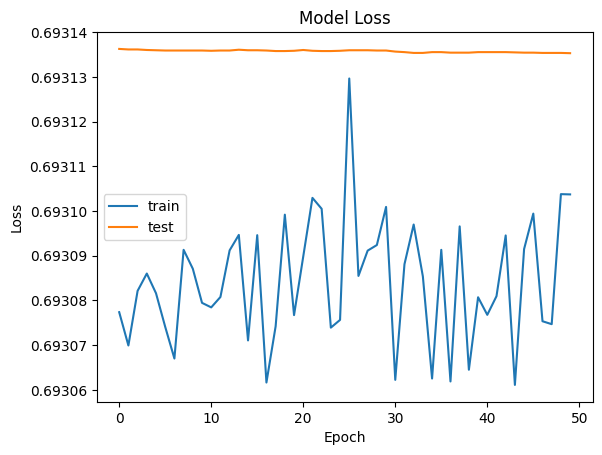

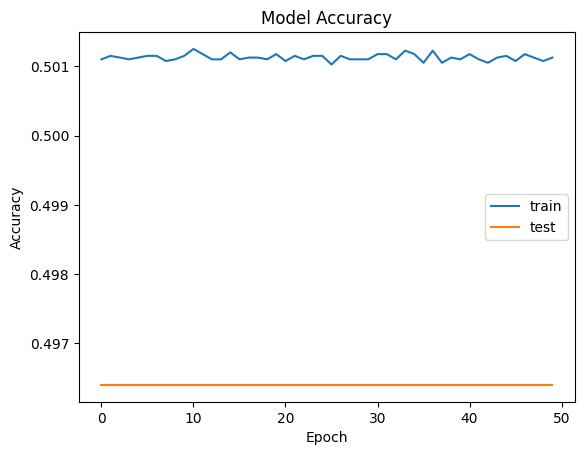

Test loss: 0.693
Test accuracy: 0.496
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.71      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.61      0.50      0.33     10000
weighted avg       0.61      0.50      0.33     10000

[[4959    2]
 [5034    5]]


In [100]:
# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [101]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.RMSprop(learning_rate=0.00001) #change learning rate and optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test to include input_dim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy:

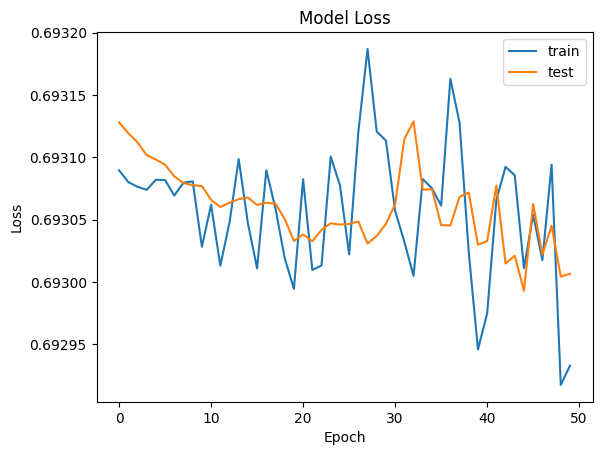

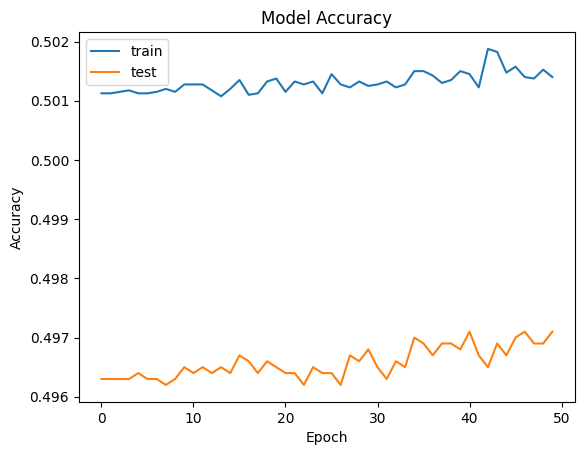

Test loss: 0.693
Test accuracy: 0.497
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.50      0.99      0.66      4961
           1       0.58      0.01      0.01      5039

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.34     10000
weighted avg       0.54      0.50      0.34     10000

[[4934   27]
 [5002   37]]


In [102]:
# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [103]:
import matplotlib.pyplot as plt
opt= tf.keras.optimizers.RMSprop(learning_rate=0.0001) #change learning rate and optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test to include input_dim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.4964
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6935 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.4965
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6934 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.4958
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6937 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4962
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6937 - accuracy: 0.5015 - val_loss: 0.6932 - val_ac

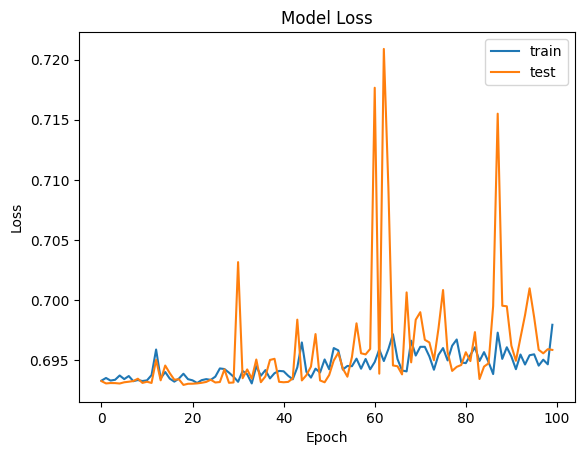

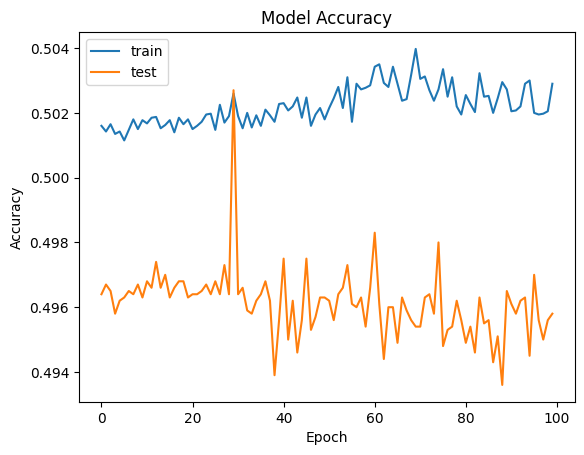

Test loss: 0.696
Test accuracy: 0.496
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.50      0.99      0.66      4961
           1       0.47      0.01      0.01      5039

    accuracy                           0.50     10000
   macro avg       0.48      0.50      0.34     10000
weighted avg       0.48      0.50      0.33     10000

[[4932   29]
 [5013   26]]


In [104]:
# plot loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split

In [11]:
# load data
df = data


In [12]:

# preprocess data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X, maxlen=500)

y = df['sentiment'].values

In [13]:
# split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# create CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=500))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          640000    
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 128)          49280     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 689,409
Trainable params: 689,409
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# train model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 0.3700 - accuracy: 0.8333 - val_loss: 0.2285 - val_accuracy: 0.9111
Epoch 2/100
625/625 [==============================] - 3s 6ms/step - loss: 0.2067 - accuracy: 0.9187 - val_loss: 0.1584 - val_accuracy: 0.9459
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.1366 - accuracy: 0.9515 - val_loss: 0.1129 - val_accuracy: 0.9636
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0815 - accuracy: 0.9757 - val_loss: 0.0882 - val_accuracy: 0.9745
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 0.0414 - accuracy: 0.9915 - val_loss: 0.0788 - val_accuracy: 0.9769
Epoch 6/100
625/625 [==============================] - 3s 6ms/step - loss: 0.0174 - accuracy: 0.9982 - val_loss: 0.0767 - val_accuracy: 0.9787
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 0.0072 - accuracy: 0.9996 - val_loss: 0.0784 - val_accuracy: 0.9790

Epoch 57/100
625/625 [==============================] - 4s 6ms/step - loss: 7.0399e-09 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9782
Epoch 58/100
625/625 [==============================] - 4s 6ms/step - loss: 6.0999e-09 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9782
Epoch 59/100
625/625 [==============================] - 4s 6ms/step - loss: 5.3613e-09 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.9782
Epoch 60/100
625/625 [==============================] - 4s 6ms/step - loss: 4.7932e-09 - accuracy: 1.0000 - val_loss: 0.2331 - val_accuracy: 0.9783
Epoch 61/100
625/625 [==============================] - 4s 6ms/step - loss: 4.3354e-09 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9783
Epoch 62/100
625/625 [==============================] - 4s 6ms/step - loss: 3.9625e-09 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9782
Epoch 63/100
625/625 [==============================] - 4s 6ms/step - loss: 3.6693e-09 - accuracy: 1.0000 - val_

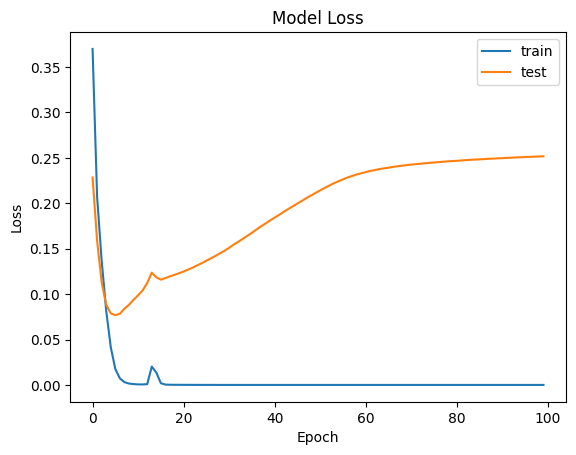

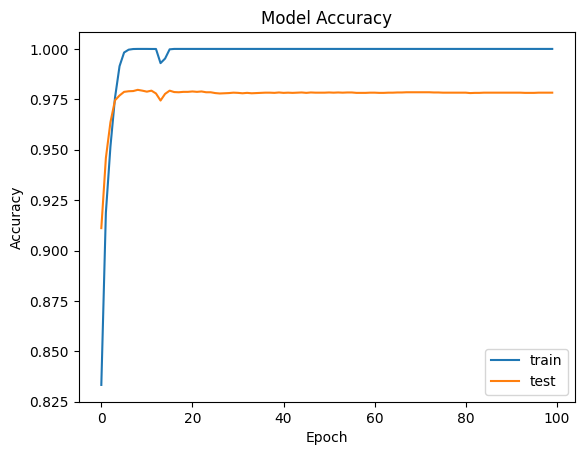

Test loss: 1.23
Test accuracy: 0.897
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5011
           1       0.90      0.89      0.90      4989

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[4524  487]
 [ 540 4449]]


In [22]:
# plot loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [23]:
model = Sequential()
model.add(Embedding(5000, 128, input_length=500))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 498, 64)           24640     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 664,705
Trainable params: 664,705
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
625/625 [==============================] - 3s 5ms/step - loss: 0.3828 - accuracy: 0.8289 - val_loss: 0.2721 - val_accuracy: 0.8870
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 0.2172 - accuracy: 0.9152 - val_loss: 0.2486 - val_accuracy: 0.8990
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 0.1442 - accuracy: 0.9498 - val_loss: 0.2521 - val_accuracy: 0.8990
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0892 - accuracy: 0.9740 - val_loss: 0.2683 - val_accuracy: 0.8994
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0480 - accuracy: 0.9893 - val_loss: 0.2913 - val_accuracy: 0.9002
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0228 - accuracy: 0.9969 - val_loss: 0.3253 - val_accuracy: 0.8990
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0101 - accuracy: 0.9995 - val_loss: 0.3553 - val_accuracy: 0.8996

Epoch 57/100
625/625 [==============================] - 3s 5ms/step - loss: 3.3494e-09 - accuracy: 1.0000 - val_loss: 1.1262 - val_accuracy: 0.8980
Epoch 58/100
625/625 [==============================] - 3s 5ms/step - loss: 3.1855e-09 - accuracy: 1.0000 - val_loss: 1.1298 - val_accuracy: 0.8981
Epoch 59/100
625/625 [==============================] - 3s 5ms/step - loss: 3.0365e-09 - accuracy: 1.0000 - val_loss: 1.1331 - val_accuracy: 0.8979
Epoch 60/100
625/625 [==============================] - 3s 5ms/step - loss: 2.9201e-09 - accuracy: 1.0000 - val_loss: 1.1362 - val_accuracy: 0.8977
Epoch 61/100
625/625 [==============================] - 3s 5ms/step - loss: 2.8223e-09 - accuracy: 1.0000 - val_loss: 1.1389 - val_accuracy: 0.8980
Epoch 62/100
625/625 [==============================] - 3s 5ms/step - loss: 2.7265e-09 - accuracy: 1.0000 - val_loss: 1.1415 - val_accuracy: 0.8976
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6520e-09 - accuracy: 1.0000 - val_

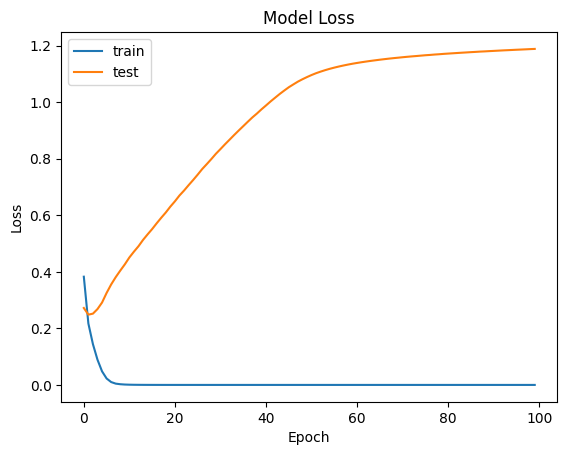

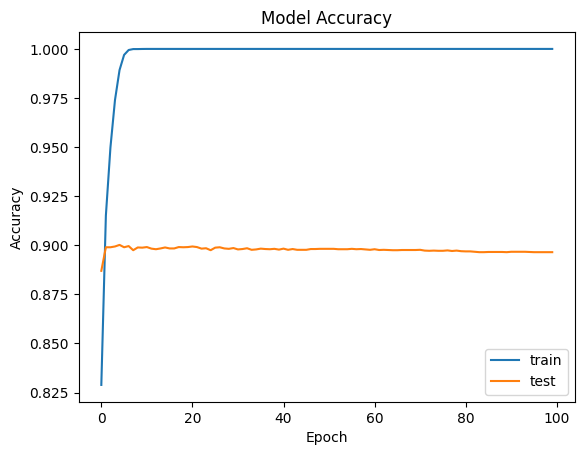

Test loss: 1.19
Test accuracy: 0.896
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5011
           1       0.90      0.89      0.90      4989

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[4523  488]
 [ 547 4442]]


In [25]:
# plot loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [14]:
# create CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=500))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 498, 128)          49280     
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 128)          49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 128)          49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                        

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
625/625 [==============================] - 14s 11ms/step - loss: 0.3949 - accuracy: 0.8070 - val_loss: 0.2743 - val_accuracy: 0.8835
Epoch 2/100
625/625 [==============================] - 7s 11ms/step - loss: 0.2224 - accuracy: 0.9115 - val_loss: 0.2756 - val_accuracy: 0.8849
Epoch 3/100
625/625 [==============================] - 7s 11ms/step - loss: 0.1562 - accuracy: 0.9392 - val_loss: 0.2936 - val_accuracy: 0.8883
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0968 - accuracy: 0.9643 - val_loss: 0.3238 - val_accuracy: 0.8895
Epoch 5/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0636 - accuracy: 0.9776 - val_loss: 0.3891 - val_accuracy: 0.8859
Epoch 6/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.5037 - val_accuracy: 0.8811
Epoch 7/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0303 - accuracy: 0.9888 - val_loss: 0.5395 - val_accuracy

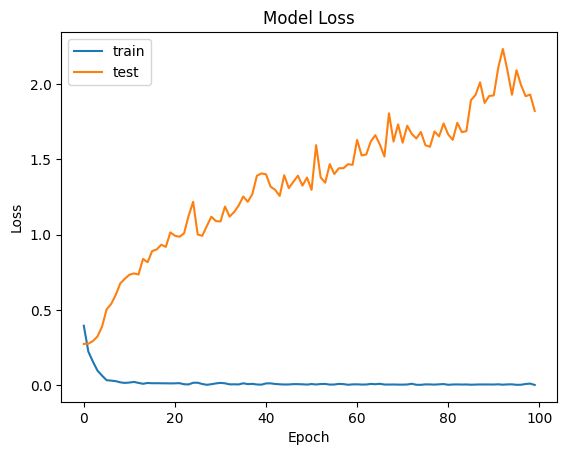

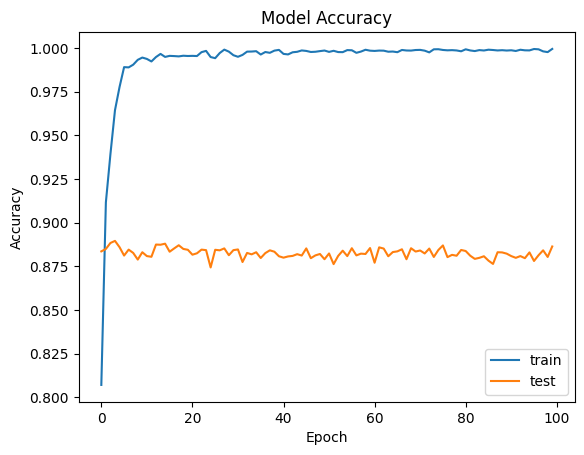

Test loss: 1.82
Test accuracy: 0.886
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5021
           1       0.88      0.89      0.89      4979

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4437  584]
 [ 553 4426]]


In [16]:
# plot loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [17]:
# create CNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=500))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          640000    
                                                                 
 conv1d_3 (Conv1D)           (None, 498, 128)          49280     
                                                                 
 conv1d_4 (Conv1D)           (None, 496, 128)          49280     
                                                                 
 conv1d_5 (Conv1D)           (None, 494, 128)          49280     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                      

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
625/625 [==============================] - 8s 12ms/step - loss: 0.3770 - accuracy: 0.8168 - val_loss: 0.2830 - val_accuracy: 0.8811
Epoch 2/100
625/625 [==============================] - 7s 12ms/step - loss: 0.2116 - accuracy: 0.9150 - val_loss: 0.2512 - val_accuracy: 0.8959
Epoch 3/100
625/625 [==============================] - 7s 12ms/step - loss: 0.1376 - accuracy: 0.9495 - val_loss: 0.2586 - val_accuracy: 0.8999
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0832 - accuracy: 0.9705 - val_loss: 0.3020 - val_accuracy: 0.8950
Epoch 5/100
625/625 [==============================] - 7s 11ms/step - loss: 0.0579 - accuracy: 0.9805 - val_loss: 0.3393 - val_accuracy: 0.8948
Epoch 6/100
625/625 [==============================] - 7s 12ms/step - loss: 0.0399 - accuracy: 0.9856 - val_loss: 0.4166 - val_accuracy: 0.8939
Epoch 7/100
625/625 [==============================] - 7s 12ms/step - loss: 0.0353 - accuracy: 0.9875 - val_loss: 0.4287 - val_accuracy:

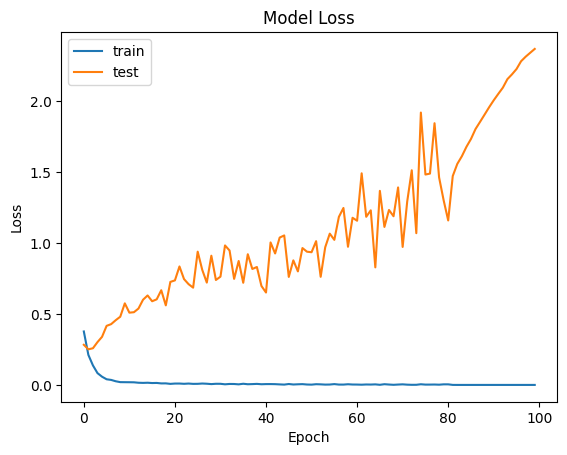

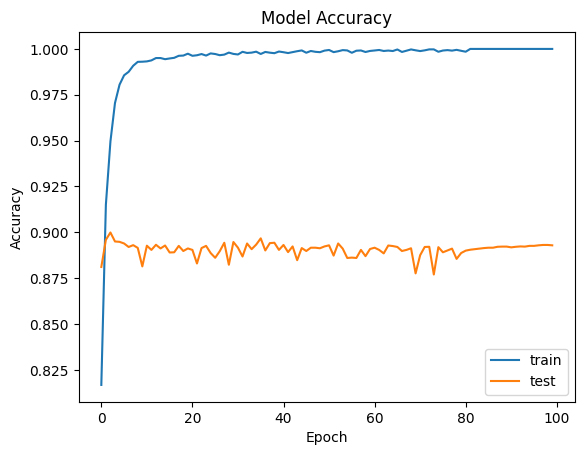

Test loss: 2.37
Test accuracy: 0.893
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5021
           1       0.88      0.91      0.89      4979

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4401  620]
 [ 451 4528]]


In [19]:
# plot loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [20]:
from tensorflow.keras.layers import MaxPool1D
model = Sequential()
model.add(Embedding(5000, 128, input_length=500))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool1D(2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool1D(2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          640000    
                                                                 
 conv1d_6 (Conv1D)           (None, 498, 128)          49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 128)         0         
 )                                                               
                                                                 
 conv1d_7 (Conv1D)           (None, 247, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 123, 128)         0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 121, 128)         

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 0.4255 - accuracy: 0.7802 - val_loss: 0.3293 - val_accuracy: 0.8541
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 0.2381 - accuracy: 0.9044 - val_loss: 0.2696 - val_accuracy: 0.8843
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 0.1747 - accuracy: 0.9341 - val_loss: 0.2924 - val_accuracy: 0.8840
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 0.1209 - accuracy: 0.9564 - val_loss: 0.3181 - val_accuracy: 0.8849
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0840 - accuracy: 0.9712 - val_loss: 0.3413 - val_accuracy: 0.8891
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0524 - accuracy: 0.9829 - val_loss: 0.4062 - val_accuracy: 0.8833
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.4391 - val_accuracy: 0.8864

Epoch 58/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 1.3149 - val_accuracy: 0.8775
Epoch 59/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.5444 - val_accuracy: 0.8826
Epoch 60/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.4678 - val_accuracy: 0.8780
Epoch 61/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 1.4797 - val_accuracy: 0.8848
Epoch 62/100
625/625 [==============================] - 5s 8ms/step - loss: 9.2345e-04 - accuracy: 0.9998 - val_loss: 1.8682 - val_accuracy: 0.8812
Epoch 63/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 2.1602 - val_accuracy: 0.8822
Epoch 64/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.6572 - val_accur

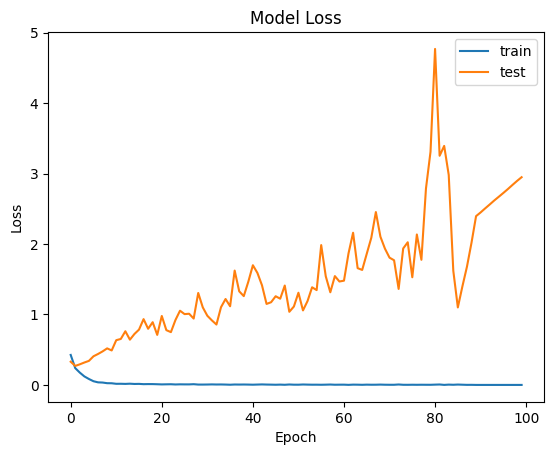

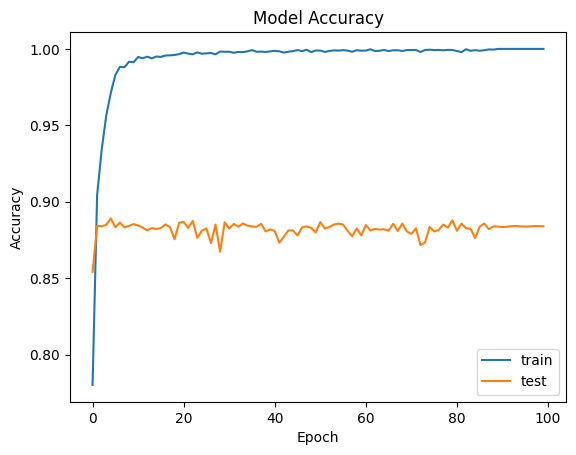

Test loss: 2.95
Test accuracy: 0.884
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5021
           1       0.89      0.88      0.88      4979

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[4463  558]
 [ 602 4377]]


In [22]:
# plot loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)